In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pymc3 as pm

WARN: Could not locate executable g77
WARN: Could not locate executable f77
WARN: Could not locate executable ifort
WARN: Could not locate executable ifl
WARN: Could not locate executable f90
WARN: Could not locate executable DF
WARN: Could not locate executable efl
WARN: Could not locate executable gfortran
WARN: Could not locate executable f95
WARN: Could not locate executable g95
WARN: Could not locate executable efort
WARN: Could not locate executable efc
WARN: Could not locate executable flang
WARN: don't know how to compile Fortran code on platform 'nt'


WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
df = pd.read_csv('D:/Germany/Study Files-TUD/TU Dortmund/--------Semester-8-Winter Term--------2023-2024/Applied Bayesian Data Analysis/Project/booking_original.csv')

In [3]:
df.head(3)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled


In [4]:
# Perform random sampling of 10,000 observations
df1 = df.sample(n=10000, random_state=42)  # Use a specific random_state for reproducibility

# Display the resulting DataFrame
print(df1)

      Booking_ID  number of adults  number of children  \
36238   INN36239                 1                   0   
83      INN00084                 2                   0   
23449   INN23450                 1                   0   
14981   INN14982                 1                   0   
18392   INN18393                 2                   0   
...          ...               ...                 ...   
6755    INN06756                 2                   0   
26612   INN26613                 2                   0   
8696    INN08697                 2                   0   
35211   INN35212                 2                   0   
20777   INN20778                 3                   0   

       number of weekend nights  number of week nights  type of meal  \
36238                         0                      1  Not Selected   
83                            1                      4   Meal Plan 1   
23449                         0                      1   Meal Plan 1   
14981          

In [5]:
df1.rename(columns={'Booking_ID':'Booking_ID','number of adults':'number_of_adults', 'number of children':'number_of_children',
                   'number of weekend nights':'number_of_weekend_nights', 'number of week nights':'number_of_week_nights',
                   'type of meal':'type_of_meal','car parking space':'car_parking_space', 'room type':'room_type',
                   'lead time':'lead_time', 'market segment type':'market_segment_type','number of adults':'number_of_adults', 'average price':'average_price','special requests':'special_requests', 
                  'date of reservation':'date_of_reservation','booking status':'booking_status'}, inplace=True)

In [6]:
df1.head(3)

,Booking_ID,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,P-C,P-not-C,average_price,special_requests,date_of_reservation,booking_status
36238,INN36239,1,0,0,1,Not Selected,0,Room_Type 1,117,Online,0,0,0,161.10,1,11/10/2018,Canceled
83,INN00084,2,0,1,4,Meal Plan 1,0,Room_Type 4,40,Online,0,0,0,98.82,0,3/14/2018,Not_Canceled
23449,INN23450,1,0,0,1,Meal Plan 1,1,Room_Type 1,7,Corporate,1,0,7,98.00,1,6/22/2018,Not_Canceled


In [7]:
df1.tail(3)

,Booking_ID,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,P-C,P-not-C,average_price,special_requests,date_of_reservation,booking_status
8696,INN08697,2,0,0,1,Not Selected,1,Room_Type 1,153,Online,0,0,0,103.5,1,7/29/2018,Canceled
35211,INN35212,2,0,0,1,Meal Plan 1,0,Room_Type 1,43,Offline,0,0,0,85.0,0,10/13/2017,Not_Canceled
20777,INN20778,3,0,0,1,Meal Plan 1,0,Room_Type 1,72,Online,0,0,0,159.3,0,5/13/2018,Canceled


In [8]:
df1.describe

<bound method NDFrame.describe of       Booking_ID  number_of_adults  number_of_children  \
36238   INN36239                 1                   0   
83      INN00084                 2                   0   
23449   INN23450                 1                   0   
14981   INN14982                 1                   0   
18392   INN18393                 2                   0   
...          ...               ...                 ...   
6755    INN06756                 2                   0   
26612   INN26613                 2                   0   
8696    INN08697                 2                   0   
35211   INN35212                 2                   0   
20777   INN20778                 3                   0   

       number_of_weekend_nights  number_of_week_nights  type_of_meal  \
36238                         0                      1  Not Selected   
83                            1                      4   Meal Plan 1   
23449                         0                      

In [9]:
df1.shape

(10000, 17)

In [10]:
df1.columns

Index(['Booking_ID', 'number_of_adults', 'number_of_children',
       'number_of_weekend_nights', 'number_of_week_nights', 'type_of_meal',
       'car_parking_space', 'room_type', 'lead_time', 'market_segment_type',
       'repeated', 'P-C', 'P-not-C', 'average_price', 'special_requests',
       'date_of_reservation', 'booking_status'],
      dtype='object')

In [11]:
df1.isna().sum()

Booking_ID                  0
number_of_adults            0
number_of_children          0
number_of_weekend_nights    0
number_of_week_nights       0
type_of_meal                0
car_parking_space           0
room_type                   0
lead_time                   0
market_segment_type         0
repeated                    0
P-C                         0
P-not-C                     0
average_price               0
special_requests            0
date_of_reservation         0
booking_status              0
dtype: int64

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 36238 to 20777
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                10000 non-null  object 
 1   number_of_adults          10000 non-null  int64  
 2   number_of_children        10000 non-null  int64  
 3   number_of_weekend_nights  10000 non-null  int64  
 4   number_of_week_nights     10000 non-null  int64  
 5   type_of_meal              10000 non-null  object 
 6   car_parking_space         10000 non-null  int64  
 7   room_type                 10000 non-null  object 
 8   lead_time                 10000 non-null  int64  
 9   market_segment_type       10000 non-null  object 
 10  repeated                  10000 non-null  int64  
 11  P-C                       10000 non-null  int64  
 12  P-not-C                   10000 non-null  int64  
 13  average_price             10000 non-null  float64
 14  sp

In [13]:
df1['booking_status'].value_counts()
print(df1['booking_status'].value_counts())

Not_Canceled    6700
Canceled        3300
Name: booking_status, dtype: int64


In [14]:
df1 = df1.drop(['Booking_ID', 'date_of_reservation'], axis=1)

In [15]:
df1

,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,P-C,P-not-C,average_price,special_requests,booking_status
36238,1,0,0,1,Not Selected,0,Room_Type 1,117,Online,0,0,0,161.10,1,Canceled
83,2,0,1,4,Meal Plan 1,0,Room_Type 4,40,Online,0,0,0,98.82,0,Not_Canceled
23449,1,0,0,1,Meal Plan 1,1,Room_Type 1,7,Corporate,1,0,7,98.00,1,Not_Canceled
14981,1,0,2,1,Meal Plan 1,0,Room_Type 1,116,Online,0,0,0,1.00,0,Not_Canceled
18392,2,0,1,0,Meal Plan 1,0,Room_Type 1,141,Offline,0,0,0,90.00,0,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6755,2,0,0,2,Meal Plan 1,0,Room_Type 1,8,Online,0,0,0,111.35,1,Not_Canceled
26612,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Offline,0,0,0,100.00,0,Canceled
8696,2,0,0,1,Not Selected,1,Room_Type 1,153,Online,0,0,0,103.50,1,Canceled
35211,2,0,0,1,Meal Plan 1,0,Room_Type 1,43,Offline,0,0,0,85.00,0,Not_Canceled


In [16]:
df1 = pd.get_dummies(df1, columns=['type_of_meal', 'room_type', 'market_segment_type'])

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 36238 to 20777
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   number_of_adults                   10000 non-null  int64  
 1   number_of_children                 10000 non-null  int64  
 2   number_of_weekend_nights           10000 non-null  int64  
 3   number_of_week_nights              10000 non-null  int64  
 4   car_parking_space                  10000 non-null  int64  
 5   lead_time                          10000 non-null  int64  
 6   repeated                           10000 non-null  int64  
 7   P-C                                10000 non-null  int64  
 8   P-not-C                            10000 non-null  int64  
 9   average_price                      10000 non-null  float64
 10  special_requests                   10000 non-null  int64  
 11  booking_status                     10000 non-null 

In [18]:
feature_columns = ['lead_time', 'number_of_adults', 'number_of_children', 'number_of_weekend_nights', 'number_of_week_nights', 'special_requests', 'average_price']
target_column = 'booking_status'

In [19]:
X = df1[feature_columns]
y = df1[target_column]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
#X = df1.drop('booking_status', axis=1)  ######need later maybe
#y = df1['booking_status']

In [22]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) ######need later maybe

In [23]:
train_data, test_data = train_test_split(df1, test_size=0.2, random_state=42)

In [24]:
X_num = train_data.select_dtypes(include = ['int64', 'float64', 'datetime'])

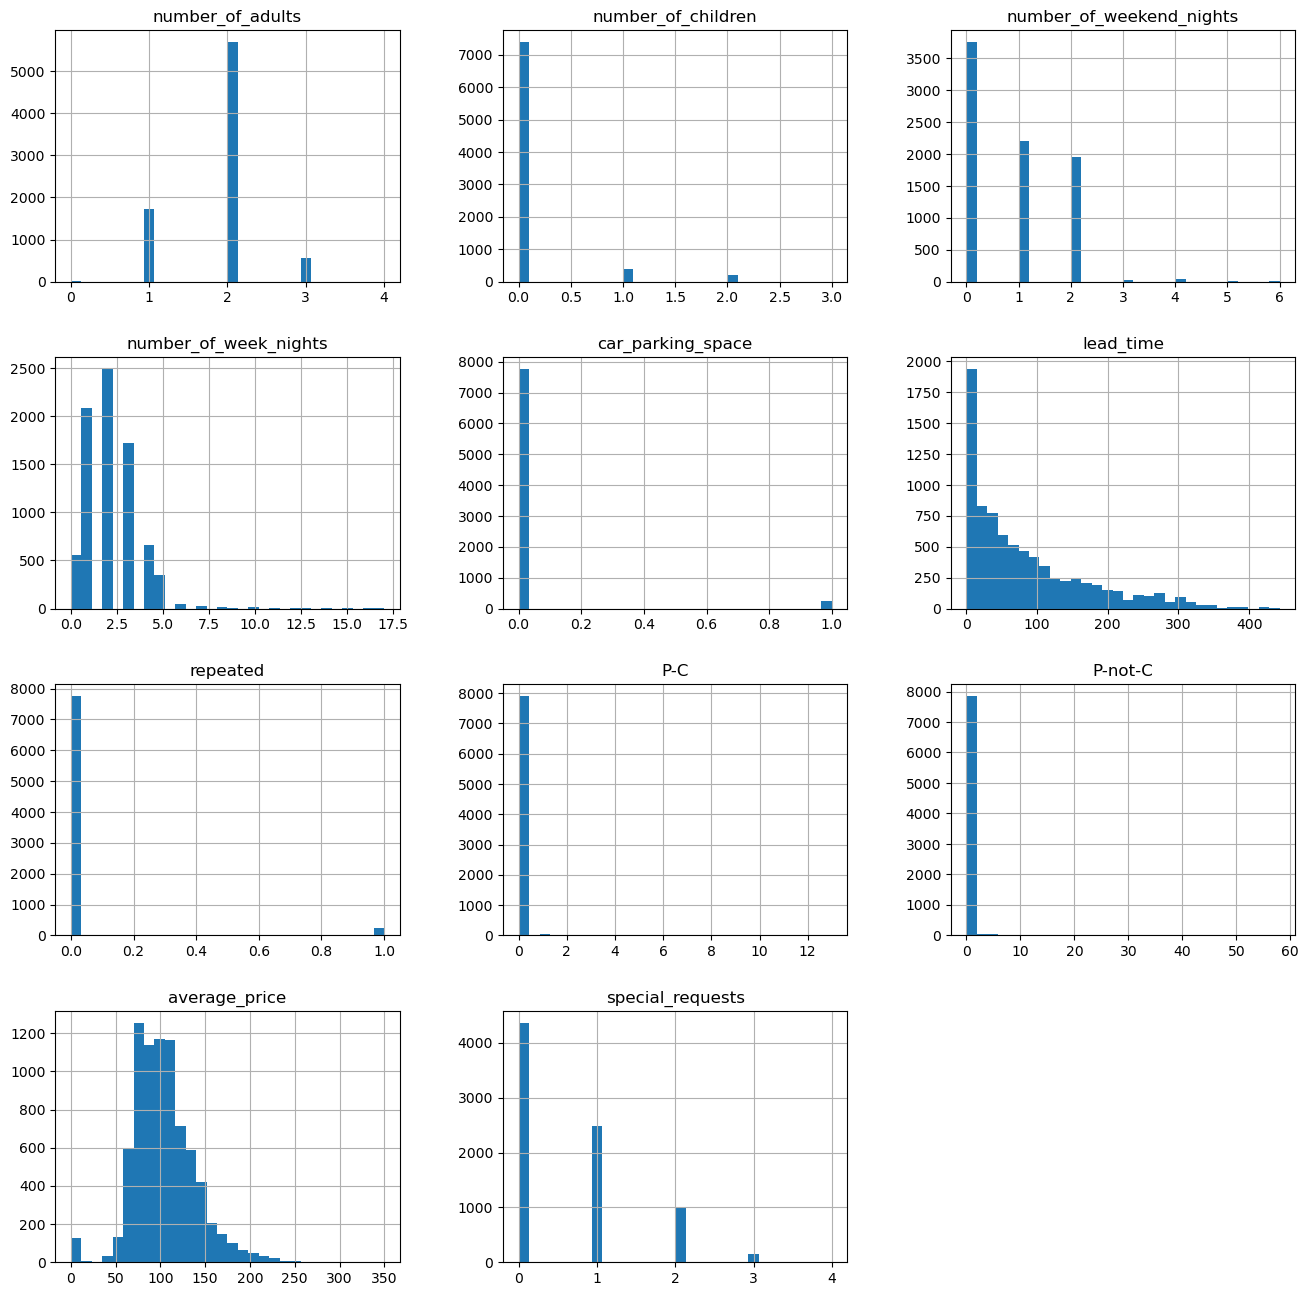

In [25]:
X_num.hist(bins = 30, figsize = (16, 16));
plt.savefig('histogram_plot.png')
plt.show()

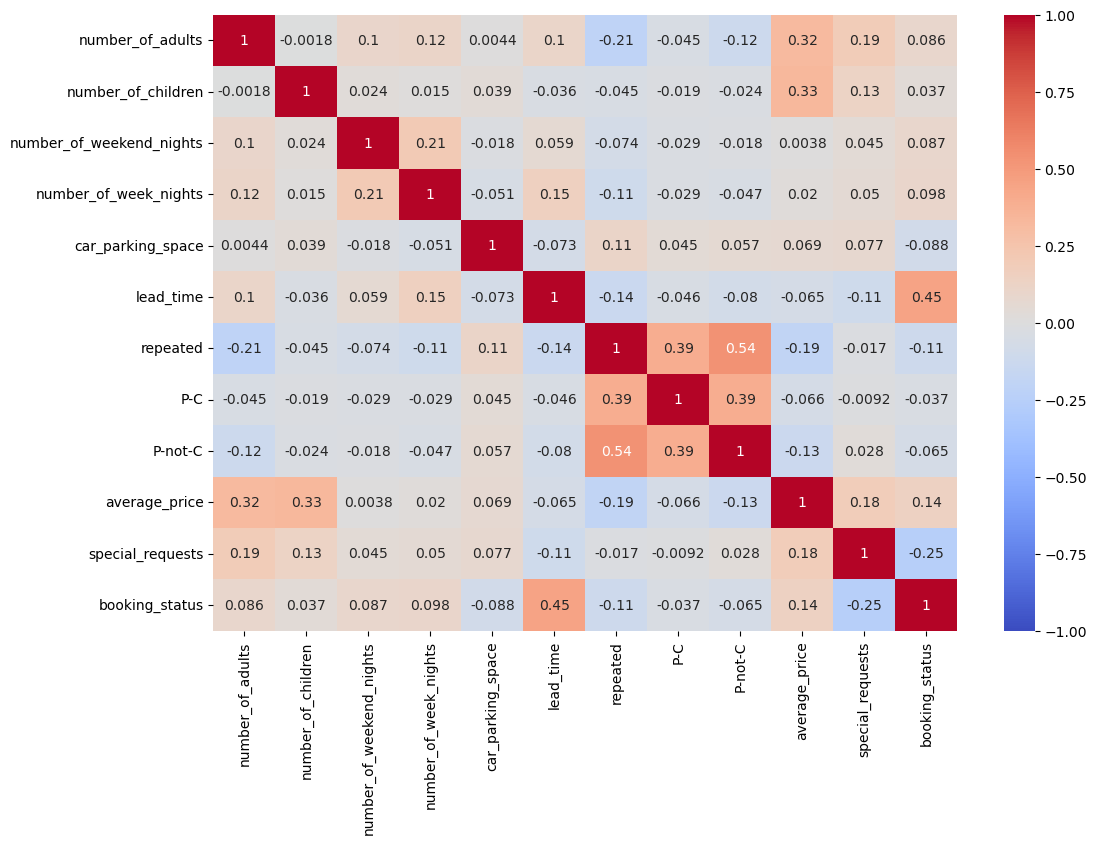

In [26]:
corr = pd.concat([X_num, (y_train == 'Canceled')], axis = 1).corr()
plt.figure(figsize = (12, 8))
sns.heatmap(corr, vmin = -1, vmax = 1, cmap = 'coolwarm', annot = True);
plt.savefig('correlation.png')

In [27]:
train_data.shape 

(8000, 28)

In [28]:
test_data.shape  

(2000, 28)

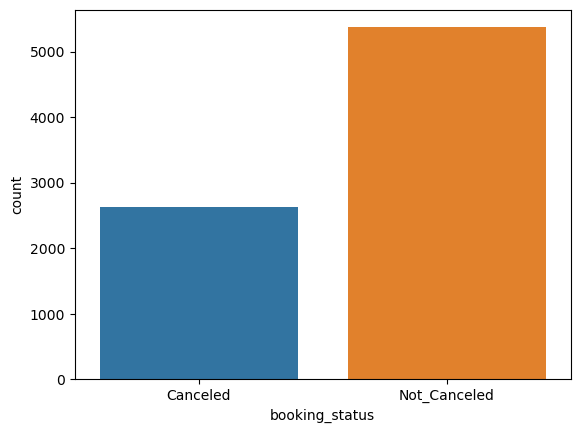

In [29]:
sns.countplot(x = y_train)
plt.savefig('train_data.png')
plt.show()

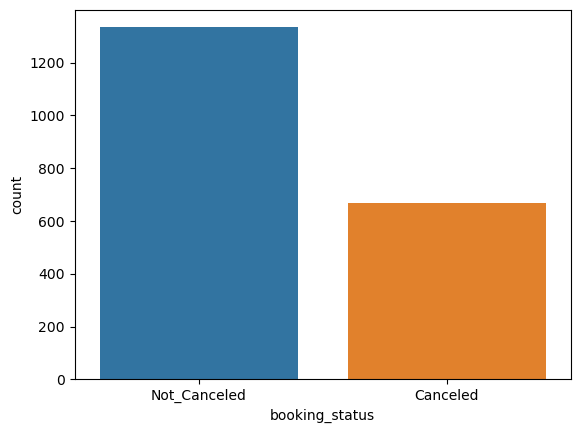

In [30]:
sns.countplot(x = y_test)
plt.savefig('test_data.png')
plt.show()

In [31]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)
print(feature_importances)

lead_time                   0.441484
average_price               0.303923
special_requests            0.087334
number_of_week_nights       0.073392
number_of_weekend_nights    0.045896
number_of_adults            0.033429
number_of_children          0.014543
dtype: float64


In [33]:
print(df1.columns)

Index(['number_of_adults', 'number_of_children', 'number_of_weekend_nights',
       'number_of_week_nights', 'car_parking_space', 'lead_time', 'repeated',
       'P-C', 'P-not-C', 'average_price', 'special_requests', 'booking_status',
       'type_of_meal_Meal Plan 1', 'type_of_meal_Meal Plan 2',
       'type_of_meal_Meal Plan 3', 'type_of_meal_Not Selected',
       'room_type_Room_Type 1', 'room_type_Room_Type 2',
       'room_type_Room_Type 3', 'room_type_Room_Type 4',
       'room_type_Room_Type 5', 'room_type_Room_Type 6',
       'room_type_Room_Type 7', 'market_segment_type_Aviation',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online'],
      dtype='object')


In [34]:
selected_columns_1 = ['lead_time', 'number_of_adults',
                     'number_of_children', 'number_of_weekend_nights',
                     'number_of_week_nights', 'special_requests',
                     'average_price', 'booking_status']
selected_df = df1[selected_columns_1]

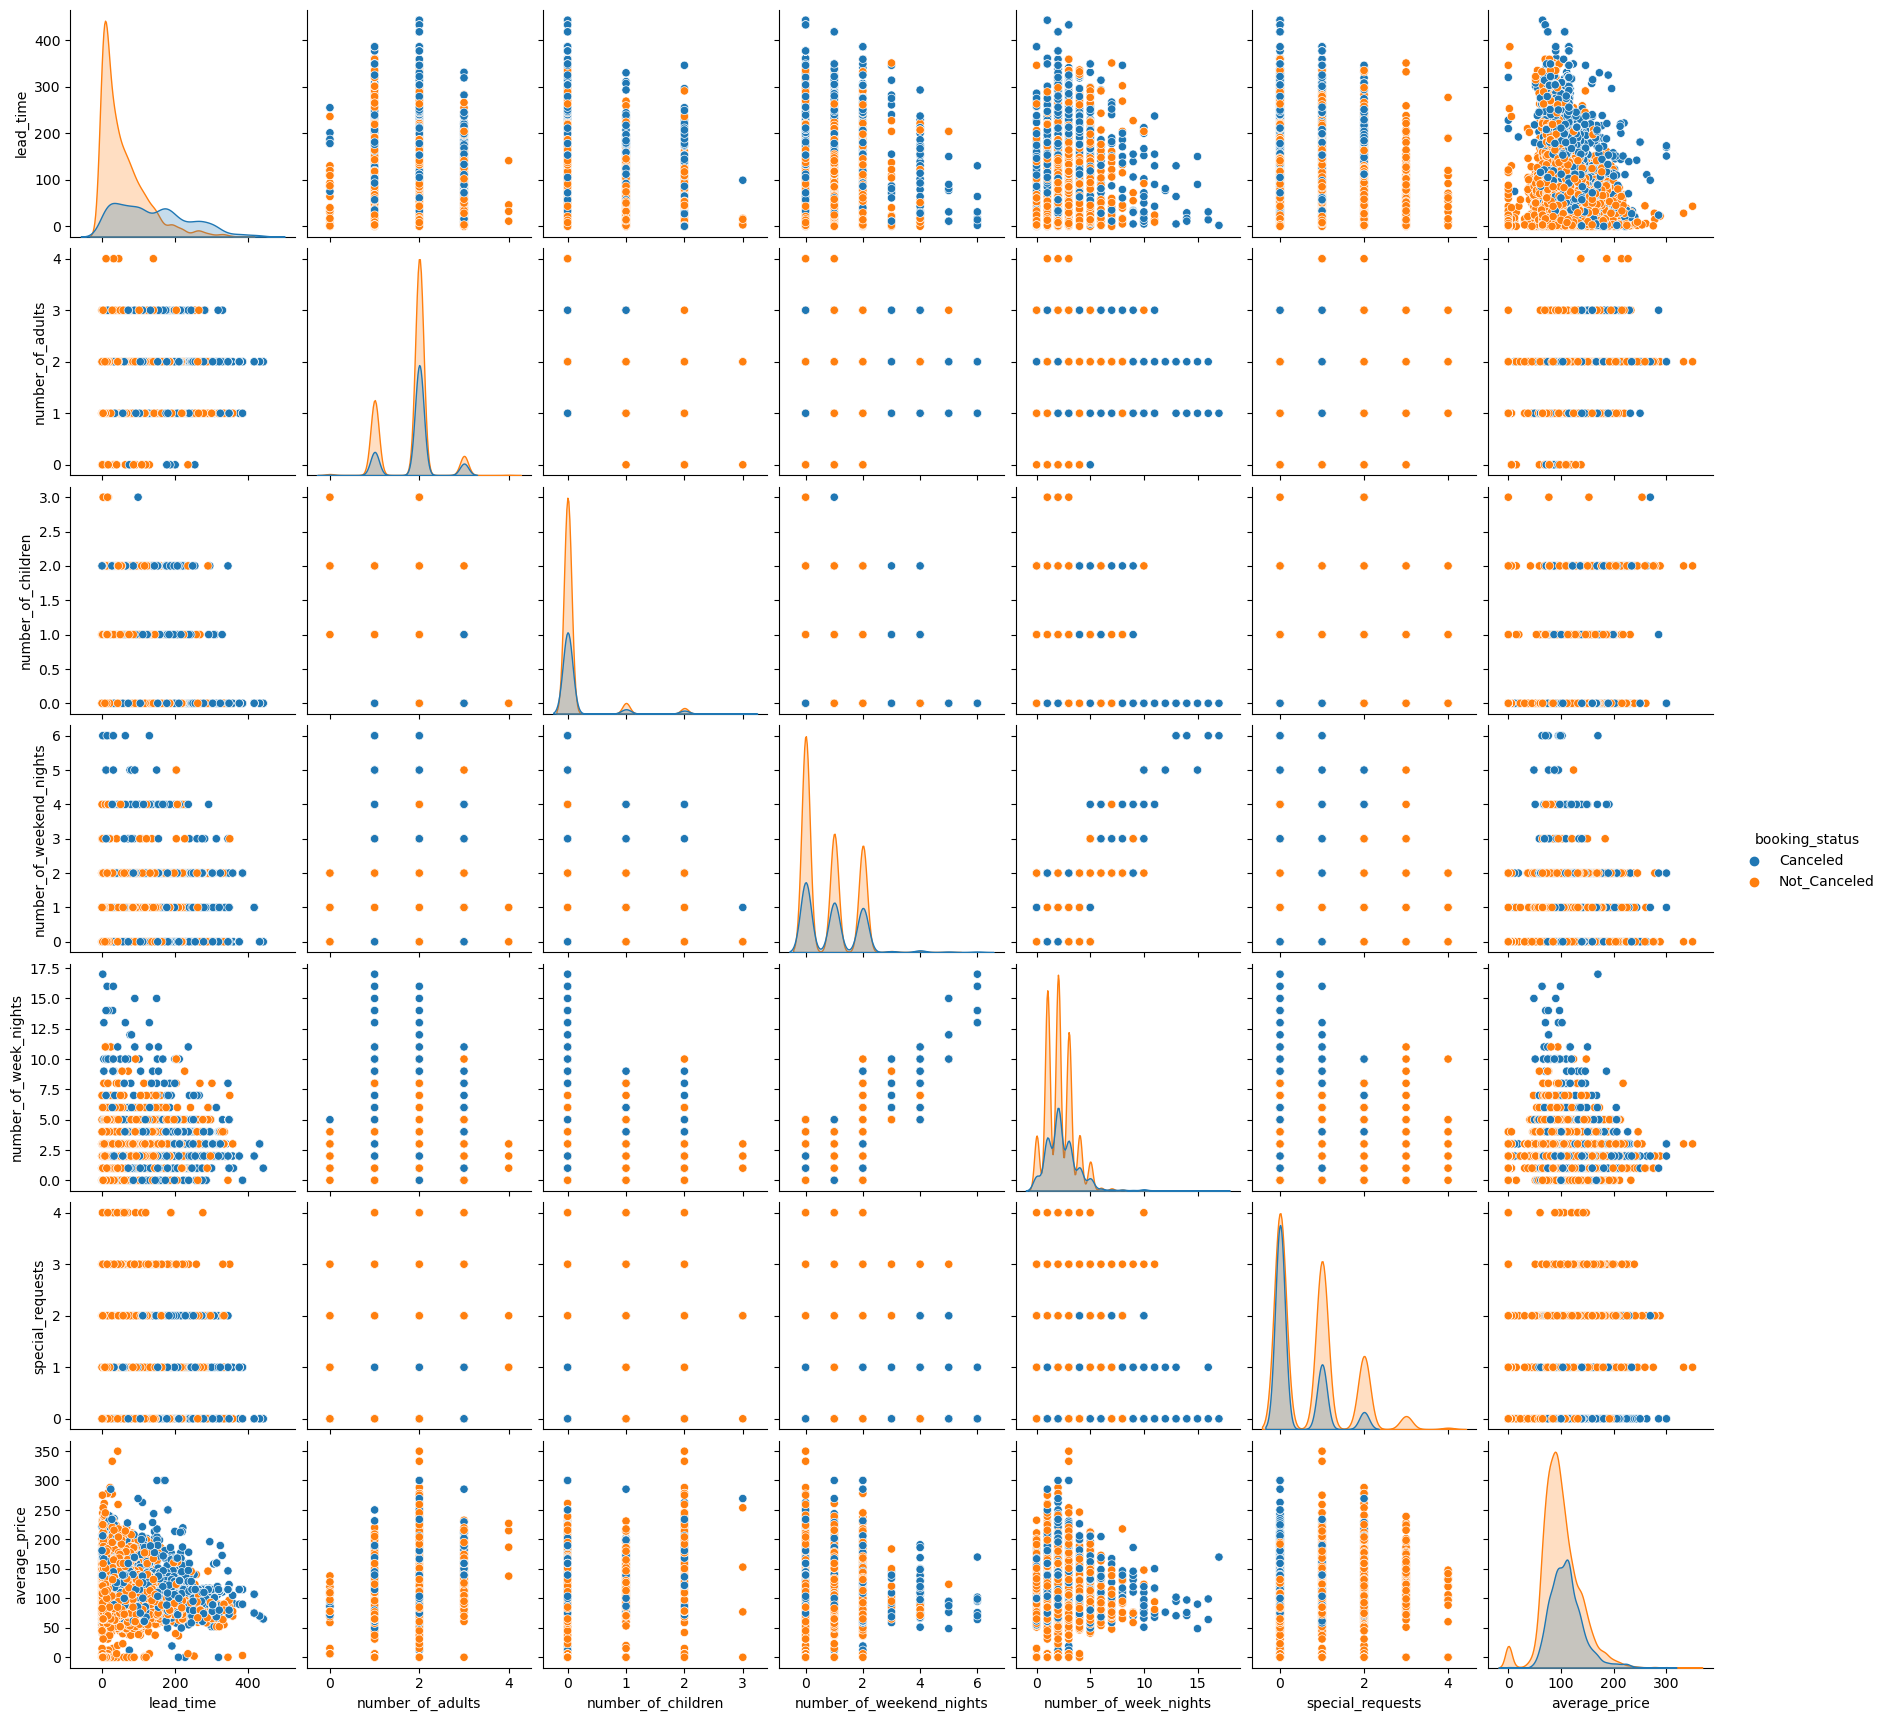

In [35]:
#Pairplot for selected variables
sns.pairplot(selected_df, hue='booking_status', diag_kind='kde')
plt.savefig('Pairplot_for_selected_variables.png')
plt.show()

Focused on: Predictive Booking Model: Implement a Bayesian model that predicts the likelihood of a successful booking based on variables such as lead time, number of adults and children, weekend and week nights, room type, and special requests. Use historical data to train the model and continuously update it to enhance accuracy.

GLM Implement 

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
C:\Users\Jishan\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\Jishan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, average_price, special_requests

Sampling 4 chains for 10 tune and 100 draw iterations (40 + 400 draws total) took 205 seconds.
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.0, but should be close to 0.8. Try to increase the number of tuning steps.
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.0, but should be close to 0.8. Try to increase the number of tuning steps.
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.0, but should be close to 0.8. Try to increase the number of tuning steps.
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.0, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for

                           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Intercept                -0.118  0.637  -0.919    0.860      0.305    0.232   
lead_time                -0.209  0.650  -0.895    0.688      0.312    0.237   
number_of_adults         -0.299  0.712  -0.948    0.823      0.342    0.260   
number_of_children        0.098  0.616  -0.898    0.760      0.295    0.225   
number_of_weekend_nights  0.339  0.322  -0.182    0.679      0.154    0.118   
number_of_week_nights     0.078  0.789  -0.737    0.979      0.379    0.288   
special_requests          0.150  0.557  -0.596    0.927      0.267    0.203   
average_price             0.340  0.452  -0.432    0.701      0.217    0.165   
sd                        1.570  0.589   0.581    2.096      0.282    0.215   

                          ess_bulk  ess_tail         r_hat  
Intercept                      4.0       4.0  3.215194e+16  
lead_time                      4.0       4.0  3.215194e+16  
number_of_adults          

C:\Users\Jishan\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


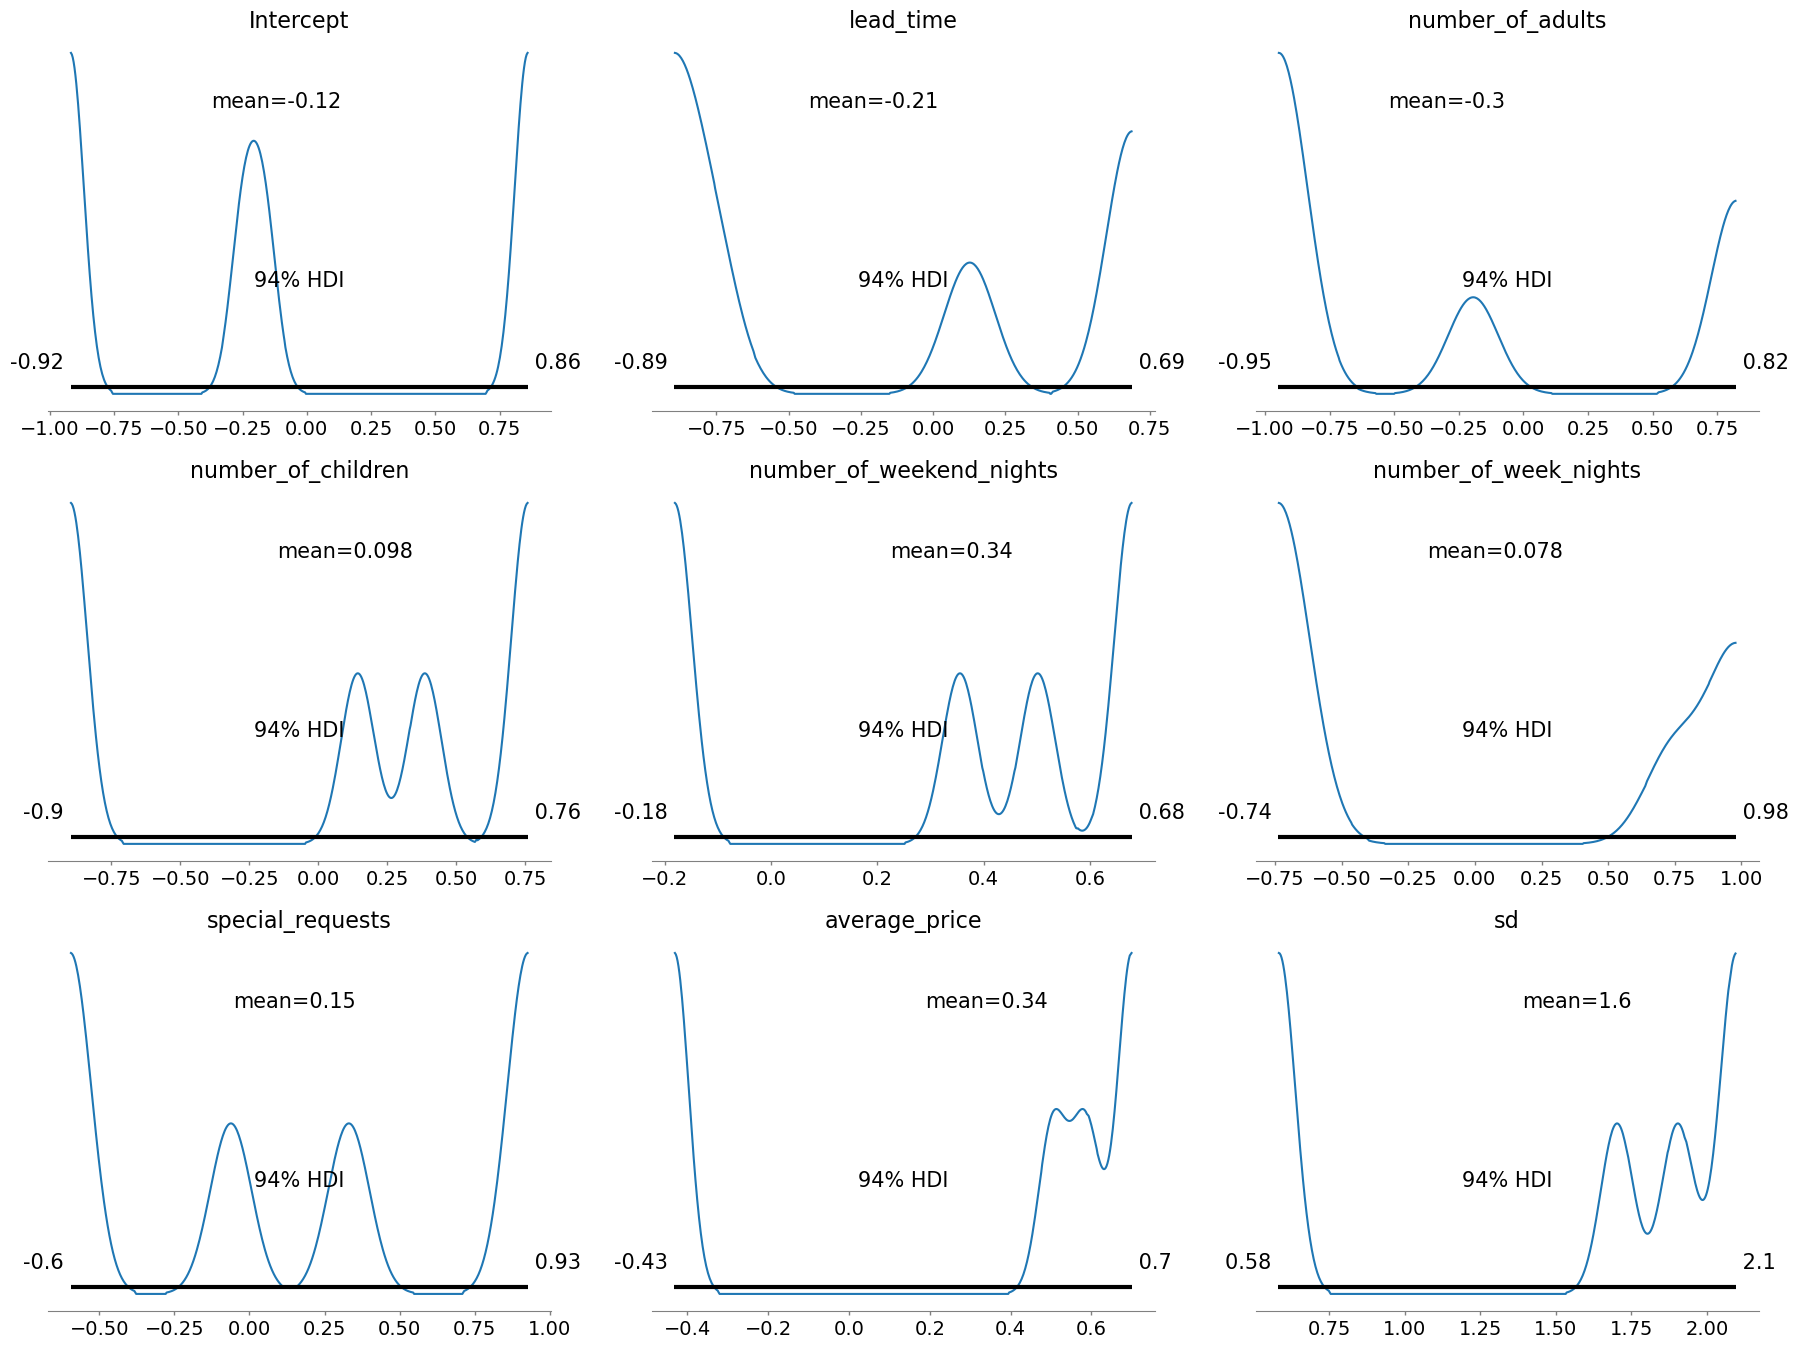

In [36]:
with pm.Model() as bayesian_model:
    pm.glm.GLM.from_formula('booking_status ~ lead_time + number_of_adults + number_of_children + number_of_weekend_nights + number_of_week_nights + special_requests + average_price', train_data)
    trace = pm.sample(100, tune=10)

# Check the summary of the Bayesian model  #average_price is also important. so need to add next training.
print(pm.summary(trace))
pm.plot_posterior(trace)
plt.savefig('summary_GLM.png')
plt.show()

In [42]:
train_X = train_data[['lead_time', 'number_of_adults', 'number_of_children', 'number_of_weekend_nights', 'number_of_week_nights', 'special_requests', 'average_price']]
train_y = train_data['booking_status']

In [37]:
test_X = test_data[['lead_time', 'number_of_adults', 'number_of_children', 'number_of_weekend_nights', 'number_of_week_nights', 'special_requests', 'average_price']]
test_y = test_data['booking_status']

In [44]:
with bayesian_model:
    post_pred_train = pm.sample_posterior_predictive(trace, samples=10)

C:\Users\Jishan\anaconda3\lib\site-packages\pymc3\sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


In [38]:
# Assuming you have the trained model from the previous step
with bayesian_model:
    post_pred = pm.sample_posterior_predictive(trace, samples=10)

C:\Users\Jishan\anaconda3\lib\site-packages\pymc3\sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


In [46]:
train_y_int_labels = train_y.map({'Canceled': 1, 'Not_Canceled': 0})
from sklearn.metrics import accuracy_score, classification_report

predicted_labels_train = (post_pred_train['y'].mean(axis=0) > 0.5).astype(int)
predicted_labels_train = predicted_labels_train[:len(train_y)]

# Calculate accuracy with integer labels for the training set
accuracy_train = accuracy_score(train_y_int_labels, predicted_labels_train)
print(f'Accuracy on training set: {accuracy_train}')

# Print classification report with integer labels for the training set
print(classification_report(train_y_int_labels, predicted_labels_train))


Accuracy on training set: 0.33625
              precision    recall  f1-score   support

           0       1.00      0.01      0.02      5367
           1       0.33      1.00      0.50      2633

    accuracy                           0.34      8000
   macro avg       0.67      0.51      0.26      8000
weighted avg       0.78      0.34      0.18      8000



In [39]:
test_y_int_labels = test_y.map({'Canceled': 1, 'Not_Canceled': 0})
from sklearn.metrics import accuracy_score, classification_report

predicted_labels = (post_pred['y'].mean(axis=0) > 0.5).astype(int)
predicted_labels = predicted_labels[:len(test_y)]

# Calculate accuracy with integer labels
accuracy = accuracy_score(test_y_int_labels, predicted_labels)
print(f'Accuracy on test set: {accuracy}')

# Print classification report with integer labels
print(classification_report(test_y_int_labels, predicted_labels))

Accuracy on test set: 0.336
              precision    recall  f1-score   support

           0       0.73      0.01      0.01      1333
           1       0.33      1.00      0.50       667

    accuracy                           0.34      2000
   macro avg       0.53      0.50      0.26      2000
weighted avg       0.60      0.34      0.17      2000



In [40]:
# List all variable names in the trace
print(trace.varnames)

['Intercept', 'lead_time', 'number_of_adults', 'number_of_children', 'number_of_weekend_nights', 'number_of_week_nights', 'special_requests', 'average_price', 'sd_log__', 'sd']


Binomial-Beta Model

C:\Users\Jishan\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 5 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [p]


C:\Users\Jishan\anaconda3\lib\site-packages\theano\scalar\basic.py:2851: RuntimeWarning: divide by zero encountered in true_divide
  return np.float32(1.0) / x
C:\Users\Jishan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in impl (vectorized)
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\scalar\basic.py:3133: RuntimeWarning: overflow encountered in expm1
  return np.expm1(x)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\scalar\basic.py:2893: RuntimeWarning: divide by zero encountered in log
  return np.log(x)


Sampling 2 chains for 5 tune and 5 draw iterations (10 + 10 draws total) took 41 seconds.
C:\Users\Jishan\anaconda3\lib\site-packages\pymc3\sampling.py:659: UserWarning: The number of samples is too small to check convergence reliably.
  warnings.warn("The number of samples is too small to check convergence reliably.")
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.0, but should be close to 0.8. Try to increase the number of tuning steps.
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.0, but should be close to 0.8. Try to increase the number of tuning steps.
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Jishan\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release

    mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
p  0.441  0.158   0.291    0.591      0.059    0.043       7.0       7.0   

   r_hat  
p    inf  


<AxesSubplot:title={'center':'p'}>

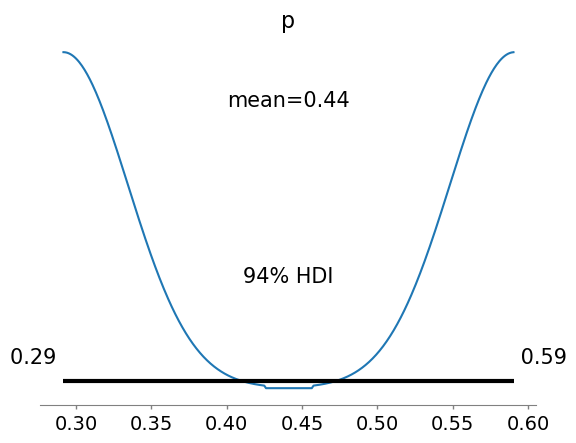

In [189]:
import pymc3 as pm
import pandas as pd
import arviz as az

# Assuming df is your DataFrame

# Encode 'booking_status' into binary format
df['booking_status'] = (df['booking_status'] == 'Canceled').astype(int)

with pm.Model() as bayesian_model:
    # Prior for the probability parameter (Beta distribution)
    p = pm.Beta('p', alpha=2, beta=2)
    
    # Likelihood (Binomial distribution)
    likelihood = pm.Binomial('likelihood', n=len(df['booking_status']), p=p, observed=df['booking_status'])
    
    # Sample from the posterior distribution
    trace = pm.sample(5, tune=5, cores=1)  # Adjust the number of samples and tuning steps as needed

# Check the summary of the Bayesian model
print(pm.summary(trace))

# Plot posterior distribution
az.plot_posterior(trace, var_names=['p'])


C:\Users\Jishan\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 5 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [p]


C:\Users\Jishan\anaconda3\lib\site-packages\theano\scalar\basic.py:2851: RuntimeWarning: divide by zero encountered in true_divide
  return np.float32(1.0) / x
C:\Users\Jishan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in impl (vectorized)
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\scalar\basic.py:3133: RuntimeWarning: overflow encountered in expm1
  return np.expm1(x)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\scalar\basic.py:2893: RuntimeWarning: divide by zero encountered in log
  return np.log(x)


Sampling 2 chains for 5 tune and 5 draw iterations (10 + 10 draws total) took 8 seconds.
C:\Users\Jishan\anaconda3\lib\site-packages\pymc3\sampling.py:659: UserWarning: The number of samples is too small to check convergence reliably.
  warnings.warn("The number of samples is too small to check convergence reliably.")
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.0, but should be close to 0.8. Try to increase the number of tuning steps.
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.0, but should be close to 0.8. Try to increase the number of tuning steps.
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Jishan\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release.

    mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  r_hat
p  0.603  0.13    0.48    0.727      0.048    0.036       7.0       7.0    inf
Probability that 'p' is greater than 0.5: 50.00%


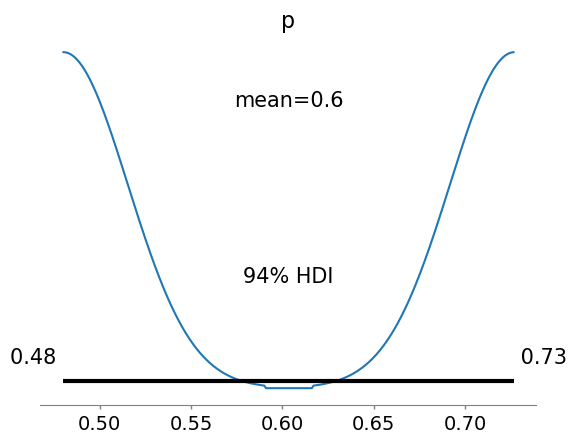

In [190]:
import pymc3 as pm
import pandas as pd
import arviz as az
from scipy.stats import percentileofscore

# Assuming df is your DataFrame

# Encode 'booking_status' into binary format
df['booking_status'] = (df['booking_status'] == 'Canceled').astype(int)

with pm.Model() as bayesian_model:
    # Prior for the probability parameter (Beta distribution)
    p = pm.Beta('p', alpha=2, beta=2)
    
    # Likelihood (Binomial distribution)
    likelihood = pm.Binomial('likelihood', n=len(df['booking_status']), p=p, observed=df['booking_status'])
    

    trace = pm.sample(5, tune=5, cores=1)  # Adjust the number of samples and tuning steps as needed


print(pm.summary(trace))


az.plot_posterior(trace, var_names=['p'])

# Hypothesis testing

threshold = 0.5
posterior_prob_greater_than_threshold = percentileofscore(trace['p'], threshold)
print(f"Probability that 'p' is greater than {threshold}: {100 - posterior_prob_greater_than_threshold:.2f}%")


Negative-Binomial-Beta Model

C:\Users\Jishan\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 5 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [p]


C:\Users\Jishan\anaconda3\lib\site-packages\theano\scalar\basic.py:2851: RuntimeWarning: divide by zero encountered in true_divide
  return np.float32(1.0) / x
C:\Users\Jishan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in impl (vectorized)
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\scalar\basic.py:2893: RuntimeWarning: divide by zero encountered in log
  return np.log(x)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\scalar\basic.py:3133: RuntimeWarning: overflow encountered in expm1
  return np.expm1(x)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\scalar\basic.py:3061: RuntimeWarning: overflow encountered in exp
  return np.exp(x)


Sampling 2 chains for 5 tune and 5 draw iterations (10 + 10 draws total) took 26 seconds.
C:\Users\Jishan\anaconda3\lib\site-packages\pymc3\sampling.py:659: UserWarning: The number of samples is too small to check convergence reliably.
  warnings.warn("The number of samples is too small to check convergence reliably.")
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Jishan\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


    mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  r_hat
p  0.032  0.02   0.008    0.077      0.008    0.006       7.0       7.0   2.32


C:\Users\Jishan\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<AxesSubplot:title={'center':'p'}>

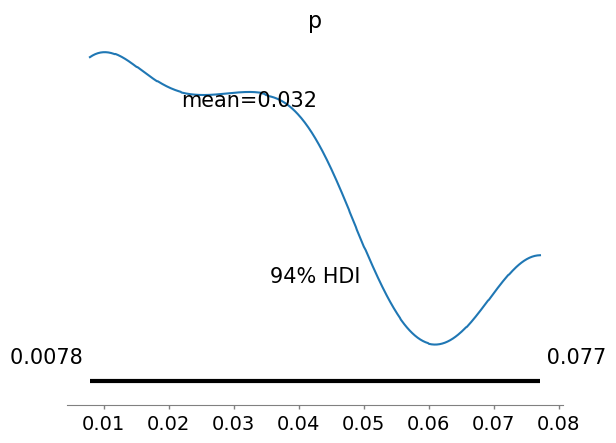

In [191]:
import pymc3 as pm
import pandas as pd
import arviz as az

# Assuming df is your DataFrame

# Encode 'booking_status' into binary format
df['booking_status'] = (df['booking_status'] == 'Canceled').astype(int)

with pm.Model() as bayesian_model:
    # Prior for the probability parameter (Beta distribution)
    p = pm.Beta('p', alpha=2, beta=2)
    

    likelihood = pm.NegativeBinomial('likelihood', mu=p, alpha=2, observed=df['booking_status'])
    

    trace = pm.sample(5, tune=5, cores=1)  # Adjust the number of samples and tuning steps as needed

# Check the summary of the Bayesian model
print(pm.summary(trace))

# Plot posterior distribution
az.plot_posterior(trace, var_names=['p'])


In [197]:
import pymc3 as pm
import arviz as az
import numpy as np

# Assuming you already have the trained model (bayesian_model) and trace from the training phase

# Assuming test_df is your testing DataFrame
# Encode 'booking_status' into binary format
test_data['booking_status'] = (test_data['booking_status'] == 'Canceled').astype(int)

# Make predictions on the test data using the trained model
with bayesian_model:
    # Get the original random variable
    p_original = bayesian_model['p']

    # Replace the original random variable with a Deterministic distribution based on the posterior samples
    p_posterior = pm.Deterministic('p_posterior', np.asarray(trace['p'].mean(axis=0), order='C'))

    # Negative Binomial likelihood for the test data
    test_likelihood = pm.NegativeBinomial('test_likelihood', mu=p_posterior, alpha=2, observed=test_data['booking_status'])

    # Sample from the posterior distribution for the test likelihood
    test_trace = pm.sample_posterior_predictive(trace, samples=5)


# Plot posterior predictive checks
az.plot_ppc(az.from_pymc3(trace, posterior_predictive=test_trace), figsize=(12, 6), mean=False)


ValueError: order must be one of 'C', 'F', 'A', or 'K' (got 'p_posterior')

Poisson-Gamma Model 

C:\Users\Jishan\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 5 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [rate]


C:\Users\Jishan\anaconda3\lib\site-packages\theano\scalar\basic.py:2893: RuntimeWarning: divide by zero encountered in log
  return np.log(x)


Sampling 2 chains for 5 tune and 5 draw iterations (10 + 10 draws total) took 9 seconds.
C:\Users\Jishan\anaconda3\lib\site-packages\pymc3\sampling.py:659: UserWarning: The number of samples is too small to check convergence reliably.
  warnings.warn("The number of samples is too small to check convergence reliably.")
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Jishan\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


       mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
rate  1.101  0.414   0.585     1.79      0.154    0.114       7.0       7.0   

      r_hat  
rate    3.0  


C:\Users\Jishan\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<AxesSubplot:title={'center':'rate'}>

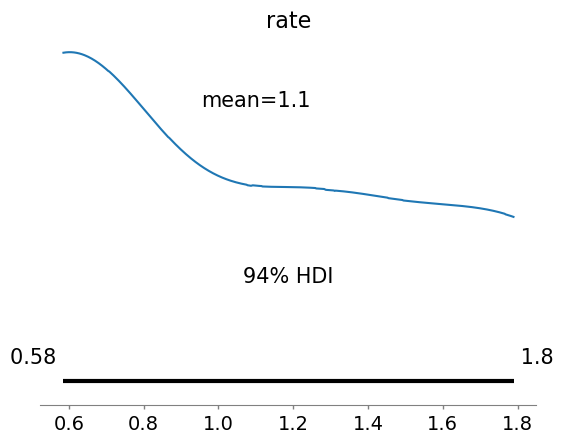

In [198]:
import pymc3 as pm
import pandas as pd
import arviz as az

# Assuming df is your DataFrame

# Encode 'booking_status' into binary format
df['booking_status'] = (df['booking_status'] == 'Canceled').astype(int)

with pm.Model() as bayesian_model:
    # Prior for the rate parameter (Gamma distribution)
    rate = pm.Gamma('rate', alpha=2, beta=2)
    
    # Poisson likelihood
    likelihood = pm.Poisson('likelihood', mu=rate, observed=df['booking_status'])
    
    # Sample from the posterior distribution
    trace = pm.sample(5, tune=5, cores=1)  # Adjust the number of samples and tuning steps as needed

# Check the summary of the Bayesian model
print(pm.summary(trace))

# Plot posterior distribution
az.plot_posterior(trace, var_names=['rate'])


In [202]:
import pymc3 as pm
import arviz as az
import numpy as np


test_data['booking_status'] = (test_data['booking_status'] == 'Canceled').astype(int)

# Make predictions on the test data using the trained model
with bayesian_model:
    # Get the original random variable
    rate_original = bayesian_model['rate']

    # Replace the original random variable with a Deterministic distribution based on the posterior samples
    rate_posterior = pm.Deterministic('rate_posterior', np.asarray(trace['rate'].mean(axis=0), order='C'))

    # Poisson likelihood for the test data
    test_likelihood = pm.Poisson('test_likelihood', mu=rate_posterior, observed=test_data['booking_status'])

    # Sample from the posterior distribution for the test likelihood
    test_trace = pm.sample_posterior_predictive(trace, samples=500)



# Plot posterior predictive checks
az.plot_ppc(az.from_pymc3(trace, posterior_predictive=test_trace), figsize=(12, 6), mean=False)


ValueError: order must be one of 'C', 'F', 'A', or 'K' (got 'rate_posterior')

Exponential-Gamma Model

C:\Users\Jishan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Jishan\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 5 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [rate]


C:\Users\Jishan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: overflow encountered in exp
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\scalar\basic.py:1813: RuntimeWarning: invalid value encountered in double_scalars
  return sum(inputs)


Sampling 2 chains for 5 tune and 5 draw iterations (10 + 10 draws total) took 0 seconds.
C:\Users\Jishan\anaconda3\lib\site-packages\pymc3\sampling.py:659: UserWarning: The number of samples is too small to check convergence reliably.
  warnings.warn("The number of samples is too small to check convergence reliably.")
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.4, but should be close to 0.8. Try to increase the number of tuning steps.
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Jishan\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 w

         mean       sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
rate  179.863  171.346  11.461    422.5     63.747   47.033       7.0   

      ess_tail  r_hat  
rate       7.0   2.11  


<AxesSubplot:title={'center':'rate'}>

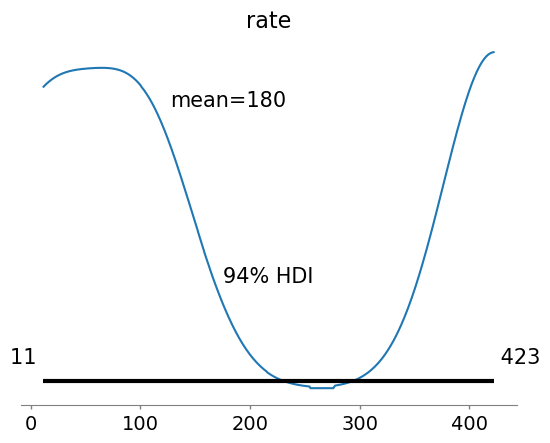

In [203]:
import pymc3 as pm
import pandas as pd
import arviz as az

# Assuming df is your DataFrame

# Encode 'booking_status' into binary format
df['booking_status'] = (df['booking_status'] == 'Canceled').astype(int)

with pm.Model() as bayesian_model:
    # Prior for the rate parameter (Gamma distribution)
    rate = pm.Gamma('rate', alpha=2, beta=2)
    
    # Exponential likelihood
    likelihood = pm.Exponential('likelihood', lam=rate, observed=df['booking_status'])
    
    # Sample from the posterior distribution
    trace = pm.sample(5, tune=5, cores=1)  # Adjust the number of samples and tuning steps as needed

# Check the summary of the Bayesian model
print(pm.summary(trace))

# Plot posterior distribution
az.plot_posterior(trace, var_names=['rate'])


In [205]:
import pymc3 as pm
import arviz as az
import numpy as np

test_data['booking_status'] = (test_data['booking_status'] == 'Canceled').astype(int)

# Make predictions on the test data using the trained model
with bayesian_model:
    # Get the original random variable
    rate_original = bayesian_model['rate']

    # Replace the original random variable with a Deterministic distribution based on the posterior samples
    rate_posterior = pm.Deterministic('rate_posterior', np.asarray(trace['rate'].mean(axis=0), order='C'))

    # Exponential likelihood for the test data
    test_likelihood = pm.Exponential('test_likelihood', lam=rate_posterior, observed=test_data['booking_status'])

    # Sample from the posterior distribution for the test likelihood
    test_trace = pm.sample_posterior_predictive(trace, samples=5)


az.plot_ppc(az.from_pymc3(trace, posterior_predictive=test_trace), figsize=(12, 6), mean=False)


ValueError: order must be one of 'C', 'F', 'A', or 'K' (got 'rate_posterior')

Index(['number_of_adults', 'number_of_children', 'number_of_weekend_nights',
       'number_of_week_nights', 'car_parking_space', 'lead_time', 'repeated',
       'P-C', 'P-not-C', 'average_price', 'special_requests', 'booking_status',
       'type_of_meal_Meal Plan 1', 'type_of_meal_Meal Plan 2',
       'type_of_meal_Meal Plan 3', 'type_of_meal_Not Selected',
       'room_type_Room_Type 1', 'room_type_Room_Type 2',
       'room_type_Room_Type 3', 'room_type_Room_Type 4',
       'room_type_Room_Type 5', 'room_type_Room_Type 6',
       'room_type_Room_Type 7', 'market_segment_type_Aviation',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online'],
      dtype='object')

Part-2 --- After that, Customer Satisfaction Analysis: Apply Bayesian analytics to assess customer satisfaction by analyzing feedback and preferences. Use variables like type of meal, car parking space availability, and room type to identify patterns that contribute to positive experiences. Implement strategies to enhance customer satisfaction and encourage repeat bookings.

In [210]:
print(df.columns)

Index(['number_of_adults', 'number_of_children', 'number_of_weekend_nights',
       'number_of_week_nights', 'car_parking_space', 'lead_time', 'repeated',
       'P-C', 'P-not-C', 'average_price', 'special_requests', 'booking_status',
       'type_of_meal_Meal Plan 1', 'type_of_meal_Meal Plan 2',
       'type_of_meal_Meal Plan 3', 'type_of_meal_Not Selected',
       'room_type_Room_Type 1', 'room_type_Room_Type 2',
       'room_type_Room_Type 3', 'room_type_Room_Type 4',
       'room_type_Room_Type 5', 'room_type_Room_Type 6',
       'room_type_Room_Type 7', 'market_segment_type_Aviation',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online'],
      dtype='object')


In [23]:
selected_columns = ['type_of_meal_Meal Plan 1', 'type_of_meal_Meal Plan 2',
                     'type_of_meal_Meal Plan 3', 'car_parking_space',
                     'room_type_Room_Type 1', 'room_type_Room_Type 2',
                     'room_type_Room_Type 3', 'special_requests', 'repeated', 'booking_status']
selected_df = df[selected_columns]


<Figure size 640x480 with 0 Axes>

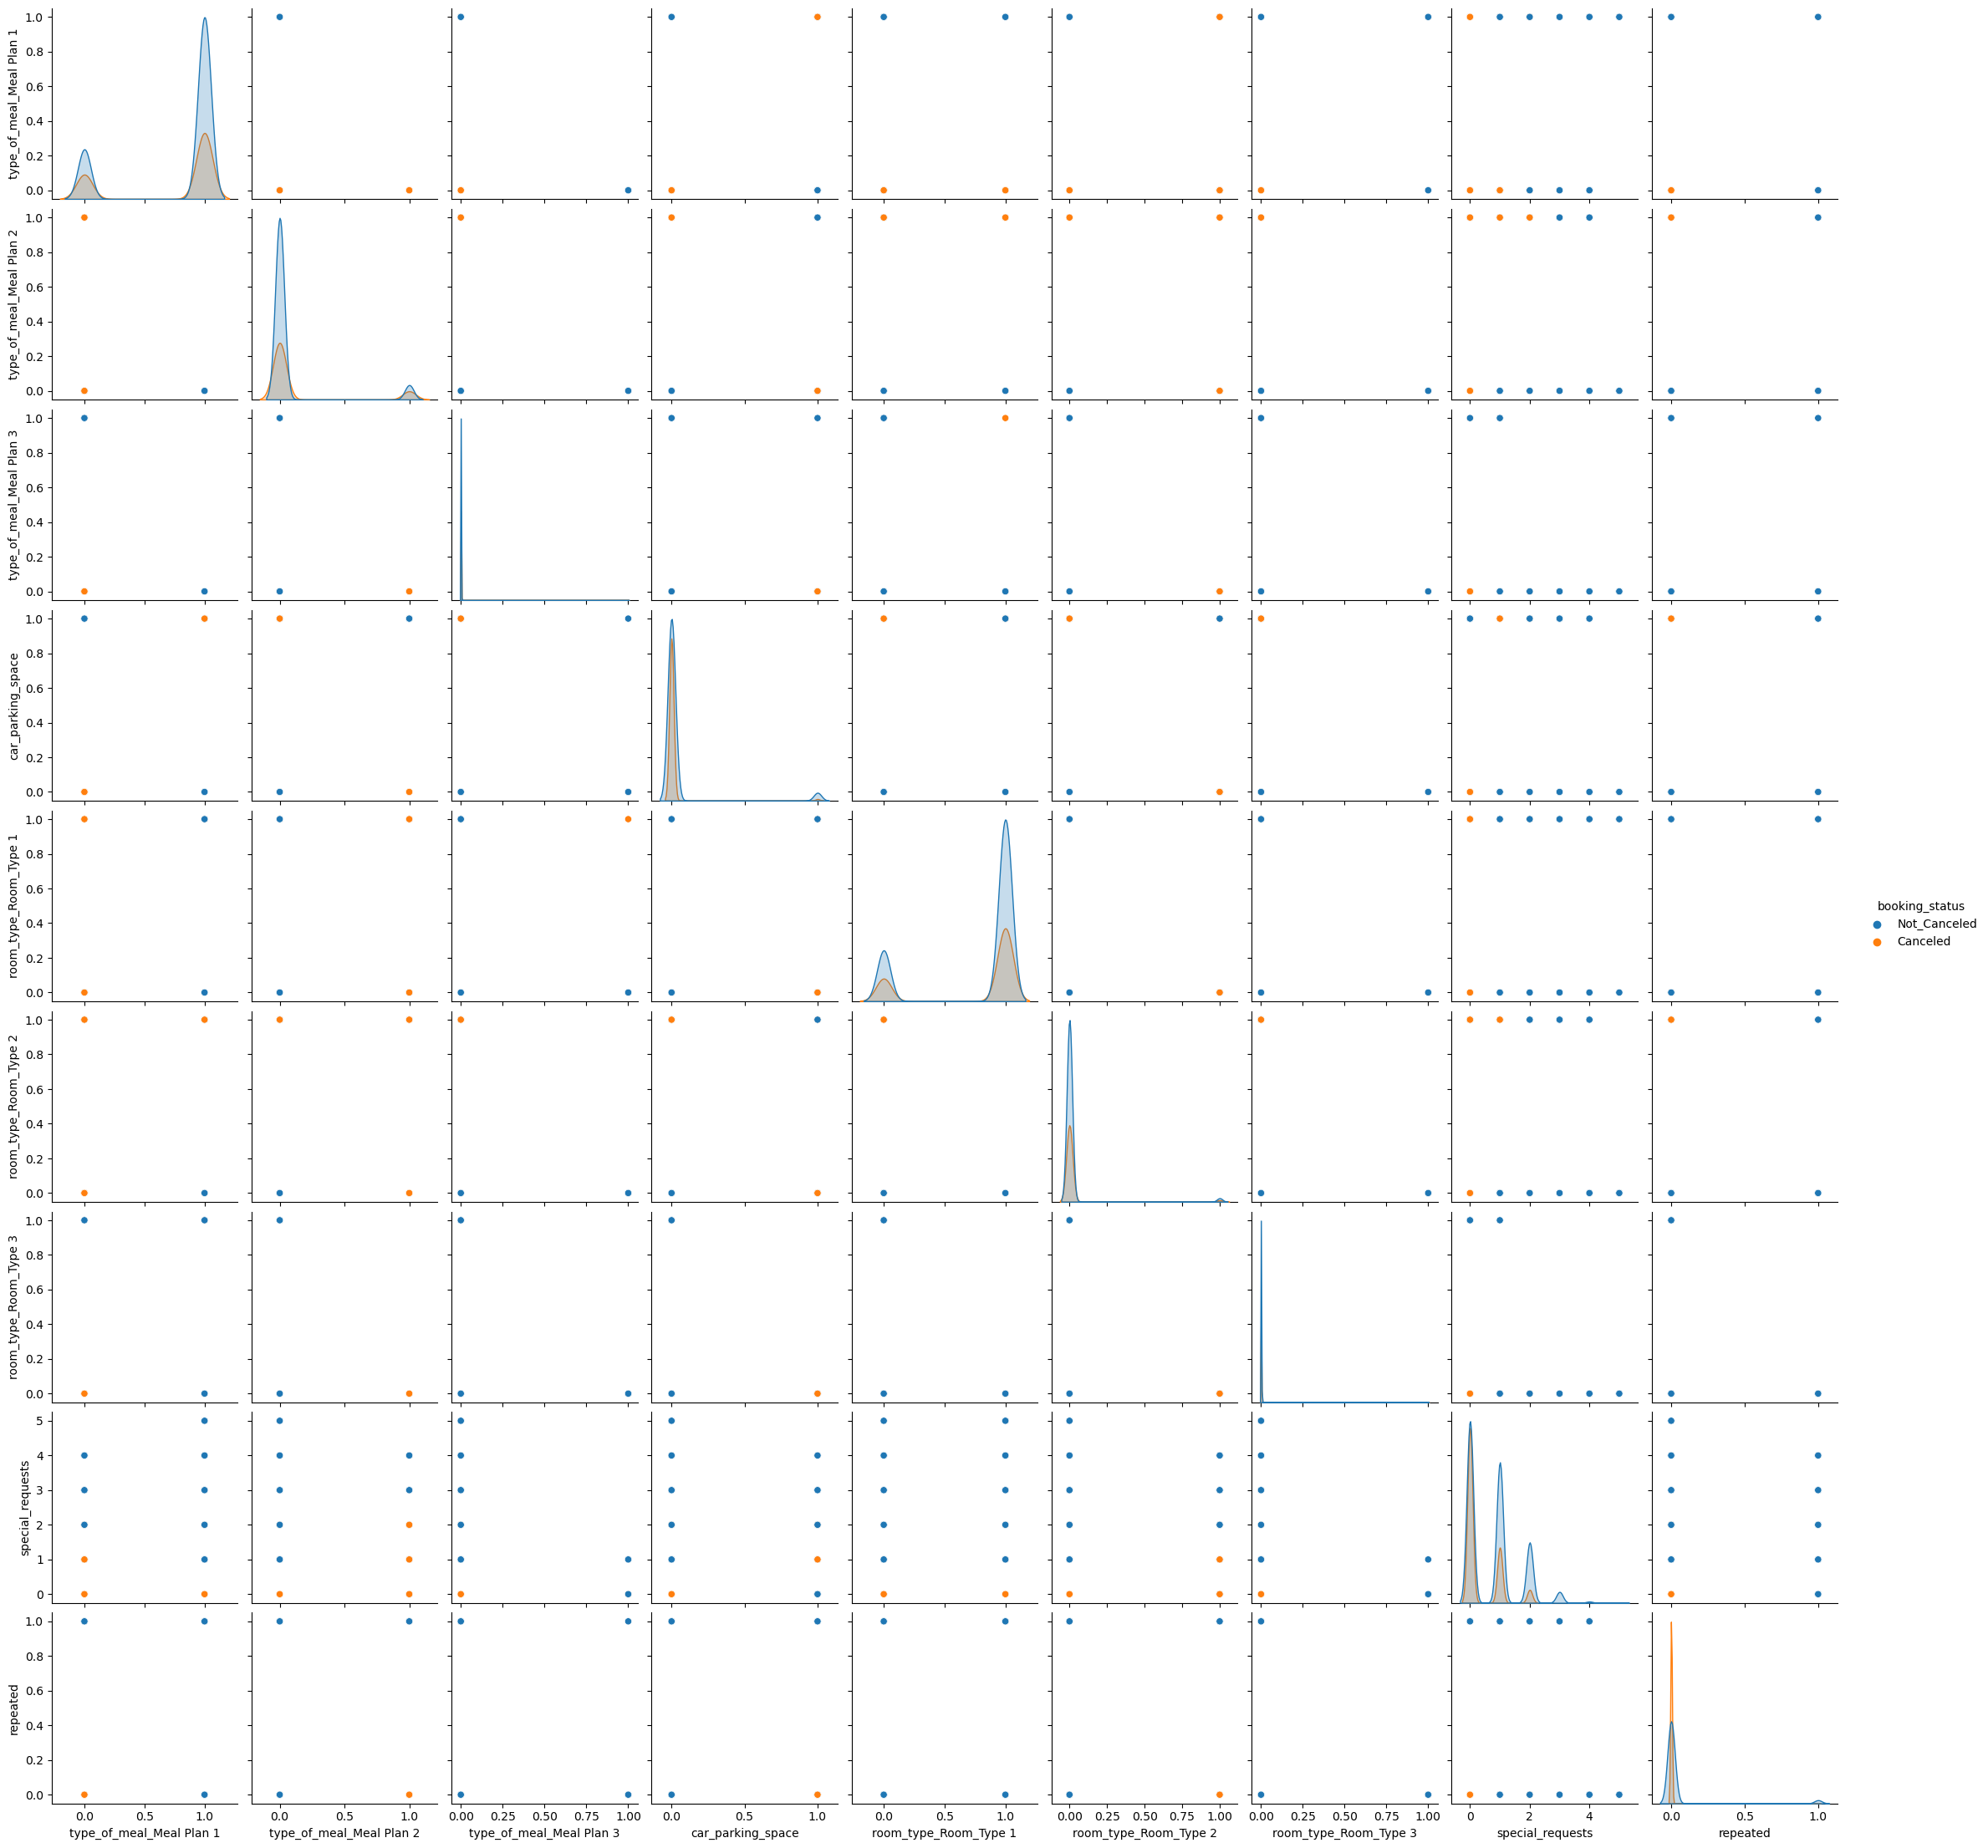

In [26]:
# Example: Pairplot for selected variables
sns.pairplot(selected_df, hue='booking_status', diag_kind='kde')
plt.savefig('tftttttt.png')
plt.show()


C:\Users\Jishan\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 10 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\Jishan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [prior_special_requests]


Sampling 4 chains for 10 tune and 10 draw iterations (40 + 40 draws total) took 57 seconds.
C:\Users\Jishan\anaconda3\lib\site-packages\pymc3\sampling.py:659: UserWarning: The number of samples is too small to check convergence reliably.
  warnings.warn("The number of samples is too small to check convergence reliably.")
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Jishan\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


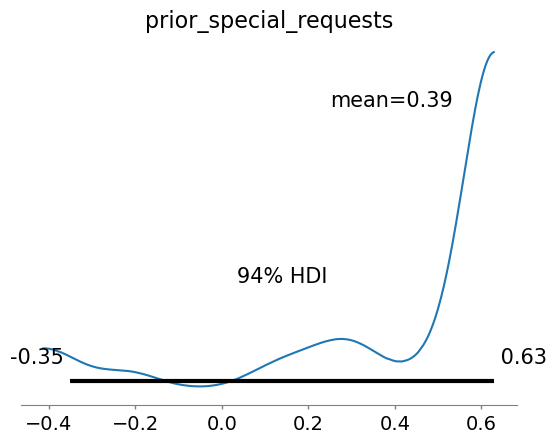

In [27]:
# Example: Bayesian analysis for special requests
with pm.Model() as model:
    # Define prior
    prior_special_requests = pm.Normal('prior_special_requests', mu=0, sd=1)
    
    # Define likelihood
    likelihood = pm.Normal('likelihood', mu=prior_special_requests, sd=1, observed=selected_df['special_requests'])
    
    # Sample from the posterior
    trace = pm.sample(10, tune=10)

# Plot the posterior distribution
pm.plot_posterior(trace)
plt.show()
